In [7]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from scipy.stats import skew, kurtosis
 from sklearn.datasets import load_diabetes
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression, LogisticRegression
 from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report


In [11]:
#Load UCI Diabetes dataset (from sklearn)
uci = load_diabetes(as_frame=True)
df_uci = uci.frame

print("UCI Diabetes Dataset Loaded")
print("Shape:", df_uci.shape)
print("Columns:", df_uci.columns.tolist())
print(df_uci.head(), "\n")

UCI Diabetes Dataset Loaded
Shape: (442, 11)
Columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0   



In [13]:
#Load Pima Indians Diabetes dataset (uploaded as diabetes.csv)
df_pima = pd.read_csv("C:/Users/SAKSHI/Downloads/CL 1/diabetes.csv")

print("Pima Indians Diabetes Dataset Loaded")
print("Shape:", df_pima.shape)
print("Columns:", df_pima.columns.tolist())
print(df_pima.head(), "\n")

Pima Indians Diabetes Dataset Loaded
Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   




 Univariate Analysis for UCI Diabetes

                mean         50%       mode     variance        std  skewness  \
age    -2.511817e-19    0.005383   0.016281     0.002268   0.047619 -0.231382   
sex     1.230790e-17   -0.044642  -0.044642     0.002268   0.047619  0.127385   
bmi    -2.245564e-16   -0.007284  -0.030996     0.002268   0.047619  0.598148   
bp     -4.797570e-17   -0.005670  -0.040099     0.002268   0.047619  0.290658   
s1     -1.381499e-17   -0.004321  -0.037344     0.002268   0.047619  0.378108   
s2      3.918434e-17   -0.003819  -0.001001     0.002268   0.047619  0.436592   
s3     -5.777179e-18   -0.006584  -0.013948     0.002268   0.047619  0.799255   
s4     -9.042540e-18   -0.002592  -0.039493     0.002268   0.047619  0.735374   
s5      9.293722e-17   -0.001947  -0.018114     0.002268   0.047619  0.291754   
s6      1.130318e-17   -0.001078   0.003064     0.002268   0.047619  0.207917   
target  1.521335e+02  140.500000  72.000000  5943.331348  77.093005  

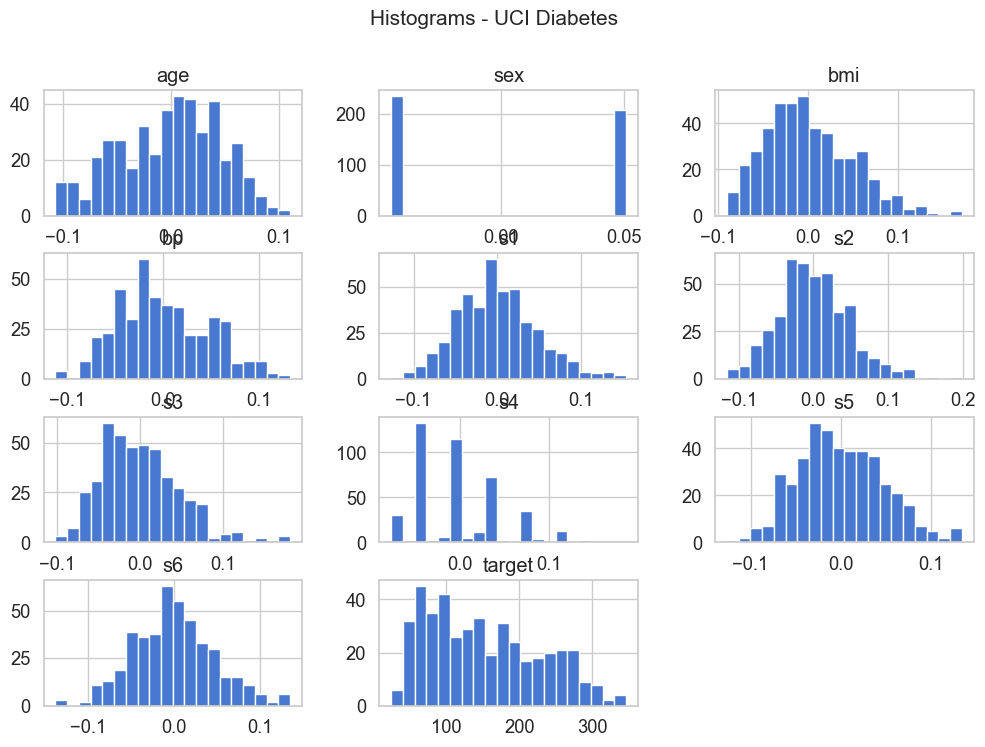

In [27]:
def univariate_analysis(df, dataset_name):
    print(f"\n Univariate Analysis for {dataset_name}\n")
    desc = df.describe().T
    desc['mode'] = df.mode().iloc[0]
    desc['variance'] = df.var()
    desc['skewness'] = df.skew()
    desc['kurtosis'] = df.kurtosis()
    print(desc[['mean','50%','mode','variance','std','skewness','kurtosis']])

    # Visualization
    df.hist(figsize=(12,8), bins=20)
    plt.suptitle(f"Histograms - {dataset_name}", fontsize=15)
    plt.show()

# Perform univariate analysis
univariate_analysis(df_uci, "UCI Diabetes")



 Univariate Analysis for Pima Diabetes

                                mean       50%    mode      variance  \
Pregnancies                 3.845052    3.0000   1.000     11.354056   
Glucose                   120.894531  117.0000  99.000   1022.248314   
BloodPressure              69.105469   72.0000  70.000    374.647271   
SkinThickness              20.536458   23.0000   0.000    254.473245   
Insulin                    79.799479   30.5000   0.000  13281.180078   
BMI                        31.992578   32.0000  32.000     62.159984   
DiabetesPedigreeFunction    0.471876    0.3725   0.254      0.109779   
Age                        33.240885   29.0000  22.000    138.303046   
Outcome                     0.348958    0.0000   0.000      0.227483   

                                 std  skewness  kurtosis  
Pregnancies                 3.369578  0.901674  0.159220  
Glucose                    31.972618  0.173754  0.640780  
BloodPressure              19.355807 -1.843608  5.180157  
Sk

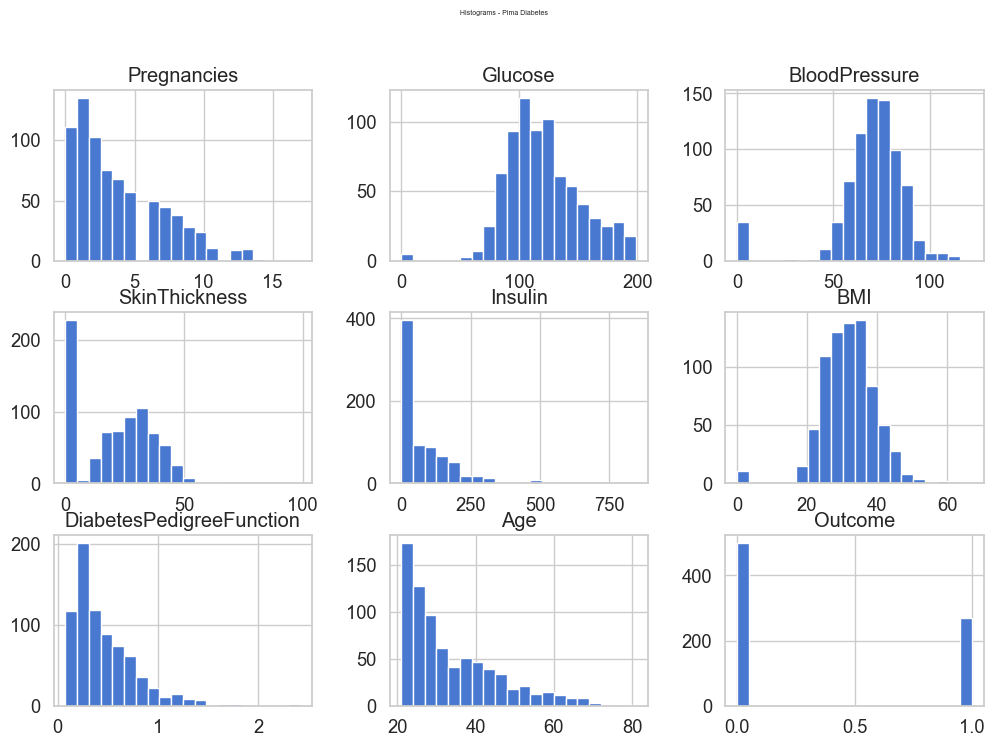

In [29]:
def univariate_analysis(df, dataset_name):
    print(f"\n Univariate Analysis for {dataset_name}\n")
    desc = df.describe().T
    desc['mode'] = df.mode().iloc[0]
    desc['variance'] = df.var()
    desc['skewness'] = df.skew()
    desc['kurtosis'] = df.kurtosis()
    print(desc[['mean','50%','mode','variance','std','skewness','kurtosis']])

    # Visualization
    df.hist(figsize=(12,8), bins=20)
    plt.suptitle(f"Histograms - {dataset_name}", fontsize=5)
    plt.show()

# Perform univariate analysis
univariate_analysis(df_pima, "Pima Diabetes")



Linear Regression (UCI Diabetes)
R2 Score: 0.4526027629719195
RMSE: 53.85344583676593


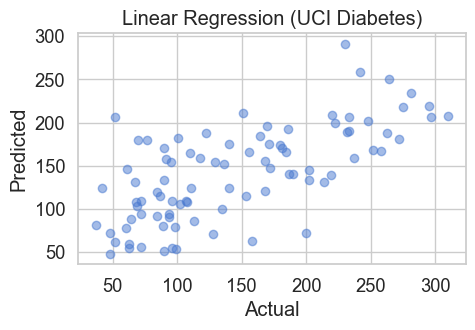

In [31]:
# Linear Regression (UCI dataset)
X_train_uci, X_test_uci, y_train_uci, y_test_uci = train_test_split(
    df_uci.drop(columns=["target"]), df_uci["target"], test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train_uci, y_train_uci)
y_pred_uci = lin_reg.predict(X_test_uci)

print("\nLinear Regression (UCI Diabetes)")
print("R2 Score:", r2_score(y_test_uci, y_pred_uci))
print("RMSE:", np.sqrt(mean_squared_error(y_test_uci, y_pred_uci)))

plt.figure(figsize=(5,3))
plt.scatter(y_test_uci, y_pred_uci, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression (UCI Diabetes)")
plt.show()


Logistic Regression (Pima Diabetes)
Accuracy: 0.7467532467532467

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



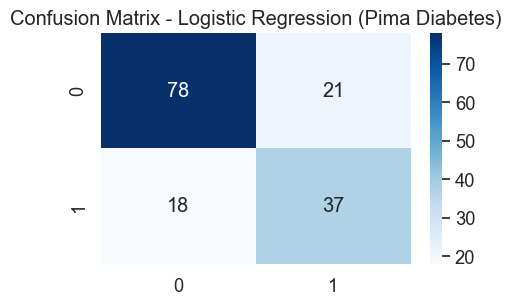

In [32]:
#Logistic Regression (Pima dataset)
X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(
    df_pima.drop(columns=["Outcome"]), df_pima["Outcome"], test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_pima, y_train_pima)
y_pred_pima = log_reg.predict(X_test_pima)

print("\nLogistic Regression (Pima Diabetes)")
print("Accuracy:", accuracy_score(y_test_pima, y_pred_pima))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_pima, y_pred_pima))
print("\nClassification Report:\n", classification_report(y_test_pima, y_pred_pima))
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test_pima, y_pred_pima), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Pima Diabetes)")
plt.show()


 Multiple Linear Regression (UCI Diabetes Dataset)
R2 Score (Multiple Regression, UCI): 0.4526027629719195
RMSE (Multiple Regression, UCI): 53.85344583676593


Text(0.5, 1.0, 'Multiple Regression (UCI Diabetes)')

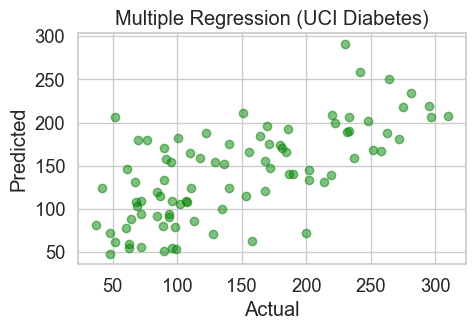

In [33]:
print("\n Multiple Linear Regression (UCI Diabetes Dataset)")

multi_reg = LinearRegression()
multi_reg.fit(X_train_uci, y_train_uci)
multi_pred = multi_reg.predict(X_test_uci)

r2_uci = r2_score(y_test_uci, multi_pred)
rmse_uci = np.sqrt(mean_squared_error(y_test_uci, multi_pred))

print("R2 Score (Multiple Regression, UCI):", r2_uci)
print("RMSE (Multiple Regression, UCI):", rmse_uci)

plt.figure(figsize=(5,3))
plt.scatter(y_test_uci, multi_pred, alpha=0.5, color='green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Regression (UCI Diabetes)")



 Multiple Logistic Regression (Pima Indians Dataset)
Accuracy (Multiple Logistic Regression, Pima): 0.7467532467532467

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



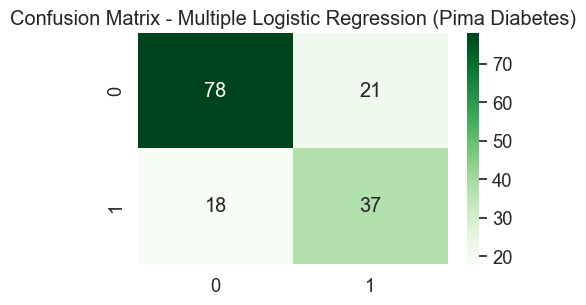

In [35]:
print("\n Multiple Logistic Regression (Pima Indians Dataset)")

multi_log_reg = LogisticRegression(max_iter=200)
multi_log_reg.fit(X_train_pima, y_train_pima)
multi_pred_pima = multi_log_reg.predict(X_test_pima)

acc_pima = accuracy_score(y_test_pima, multi_pred_pima)

print("Accuracy (Multiple Logistic Regression, Pima):", acc_pima)
print("\nConfusion Matrix:\n", confusion_matrix(y_test_pima, multi_pred_pima))
print("\nClassification Report:\n", classification_report(y_test_pima, multi_pred_pima))

plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test_pima, multi_pred_pima), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Multiple Logistic Regression (Pima Diabetes)")
plt.show()


 Final Comparison:
UCI Diabetes (Regression Problem) → Evaluated using R2, RMSE
Pima Indians Diabetes (Classification Problem) → Evaluated using Accuracy, Confusion Matrix


C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_9848\1382843301.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


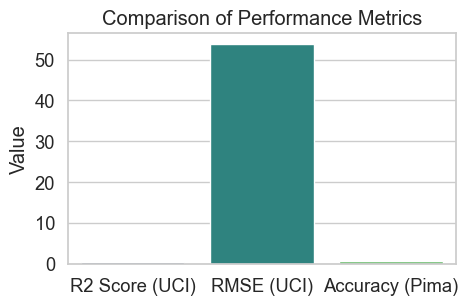

In [37]:
print("\n Final Comparison:")
print("UCI Diabetes (Regression Problem) → Evaluated using R2, RMSE")
print("Pima Indians Diabetes (Classification Problem) → Evaluated using Accuracy, Confusion Matrix")

 # Comparison Visualization
metrics = ['R2 Score (UCI)', 'RMSE (UCI)', 'Accuracy (Pima)']
values = [r2_uci, rmse_uci, acc_pima]
plt.figure(figsize=(5,3))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.title("Comparison of Performance Metrics")
plt.ylabel("Value")
plt.show()

C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_9848\2444082795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['R2 Score','RMSE'], y=[r2_uci, rmse_uci], palette="mako")
C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_9848\2444082795.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[acc_pima], palette="rocket")


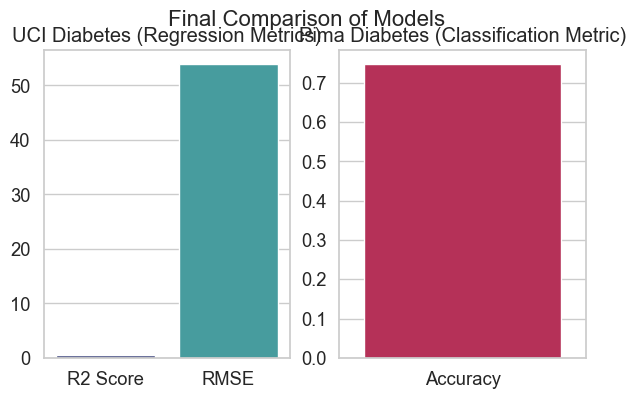

In [38]:
#Side-by-Side Comparison
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
sns.barplot(x=['R2 Score','RMSE'], y=[r2_uci, rmse_uci], palette="mako")
plt.title("UCI Diabetes (Regression Metrics)")

plt.subplot(1,2,2)
sns.barplot(x=['Accuracy'], y=[acc_pima], palette="rocket")
plt.title("Pima Diabetes (Classification Metric)")

plt.suptitle("Final Comparison of Models", fontsize=16)
plt.show()